In [1]:
#!pip install geopandas shapely pyproj
#!pip install geopy
#!pip install unidecode

In [2]:
import geopandas as gpd
import os 
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from unidecode import unidecode

In [3]:
#LIMITE_DEPARTAMENTAL_INEI_geogpsperu
os.chdir('C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/inputs/shape_files/GPK/Provincia')
gdf = gpd.read_file('PROVINCIA.gpkg')
gdf_1=gdf.iloc[:,[0,4,5,8]].copy()
gdf_1


,id,NOMBDEP,NOMBPROV,geometry
0,1,AMAZONAS,BAGUA,"MULTIPOLYGON (((-78.61909 -4.51001, -78.61802 ..."
1,2,AMAZONAS,BONGARA,"MULTIPOLYGON (((-77.72759 -5.1403, -77.72361 -..."
2,3,AMAZONAS,CHACHAPOYAS,"MULTIPOLYGON (((-77.72614 -5.94354, -77.72486 ..."
3,4,AMAZONAS,CONDORCANQUI,"MULTIPOLYGON (((-77.81399 -2.99278, -77.81483 ..."
4,5,AMAZONAS,LUYA,"MULTIPOLYGON (((-78.13023 -5.9037, -78.13011 -..."
...,...,...,...,...
188,189,TUMBES,ZARUMILLA,"MULTIPOLYGON (((-80.28521 -3.41276, -80.28406 ..."
189,190,UCAYALI,ATALAYA,"MULTIPOLYGON (((-73.18146 -9.41174, -73.13475 ..."
190,191,UCAYALI,CORONEL PORTILLO,"MULTIPOLYGON (((-74.47145 -7.27617, -74.47052 ..."
191,192,UCAYALI,PADRE ABAD,"MULTIPOLYGON (((-75.43663 -8.22999, -75.43651 ..."


# REPRESENTACIÓN DE LOS PROVINCIAS EN PERÚ 

C:\Users\FERNANDO\AppData\Local\Temp\ipykernel_26692\736258550.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  dist_peru= gdf_1.unary_union


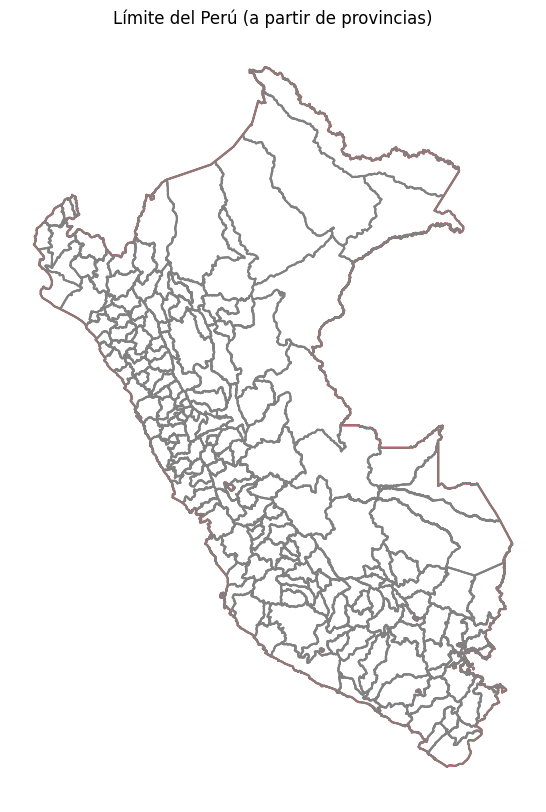

In [4]:
# en el presente codigo sacaremos una distancia relativa de cada provincia a la capital
import matplotlib.pyplot as plt
dist_peru= gdf_1.unary_union

limite_gdf = gpd.GeoDataFrame(geometry=[dist_peru], crs=gdf_1.crs)

fig, ax = plt.subplots(figsize=(8, 10))
limite_gdf.boundary.plot(ax=ax, color='red')  # contorno del Perú
gdf_1.boundary.plot(ax=ax, color='gray')
ax.set_title("Límite del Perú (a partir de provincias)")
plt.axis('off')
plt.show()



In [5]:
os.chdir('C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/inputs/shape_files/capital_dep')

capxprv=pd.read_excel('capxdep.xlsx')

capxprv['Departamento'] = capxprv['Departamento'].str.upper()

capxprv['Capital'] = capxprv['Capital'].str.upper()

capxprv_1=capxprv.iloc[1:,:-1].reset_index(drop=True)
capxprv_1=capxprv_1.dropna()
capxprv.dtypes

n_ubbig=[]

for elem in capxprv_1['Ubigeo']:
    if int(elem)<10:
        n_ubbig+=['0'+str(int(elem))]
    else:
        n_ubbig+=[str(int(elem))]
n_ubbig

capxprv_1['Ubigeo']=n_ubbig

capxprv_1.reset_index(drop=True)

capxprv_1

,Ubigeo,Departamento,Capital
0,01,AMAZONAS,CHACHAPOYAS
1,02,ÁNCASH,HUARAZ
2,03,APURÍMAC,ABANCAY
3,04,AREQUIPA,AREQUIPA
4,05,AYACUCHO,AYACUCHO
5,06,CAJAMARCA,CAJAMARCA
6,07,CALLAO,CALLAO
7,08,CUSCO,CUZCO
8,09,HUANCAVELICA,HUANCAVELICA
9,10,HUÁNUCO,HUÁNUCO


In [ ]:
import time
# Función para obtener coordenadas
def obtener_coordenadas(ciudad, region):
    geolocator = Nominatim(user_agent="peru_capitals")
    location = geolocator.geocode(f"{ciudad}, {region}, Perú")
    if location:
        return (location.latitude, location.longitude)
    return None

capitales_data = []
for idx, row in capxprv_1.iterrows():
    ubig=row['Ubigeo']
    departamento=row['Departamento']
    capital=row['Capital']
    coords = obtener_coordenadas(capital, departamento)
    if coords:
        capitales_data.append({
            "region": departamento,
            "capital": capital,
            "latitud": coords[0],
            "longitud": coords[1]
        })
    time.sleep(1)  # Para evitar sobrecargar el servidor


In [7]:
df_capitales = pd.DataFrame(capitales_data)
df_capitales

,region,capital,latitud,longitud
0,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338
1,ÁNCASH,HUARAZ,-9.529851,-77.528998
2,APURÍMAC,ABANCAY,-13.637348,-72.878874
3,AREQUIPA,AREQUIPA,-16.398867,-71.536961
4,AYACUCHO,AYACUCHO,-13.160427,-74.225697
5,CAJAMARCA,CAJAMARCA,-7.156668,-78.517306
6,CALLAO,CALLAO,-12.052263,-77.139113
7,CUSCO,CUZCO,-13.516954,-71.979271
8,HUANCAVELICA,HUANCAVELICA,-12.787280,-74.973095
9,HUÁNUCO,HUÁNUCO,-9.929325,-76.239485


In [8]:
# SE COMPRUEBA QUE LAS COLUMNAS DE INTERES SON OBJETOS
# PRINCIPALMENTE SE NECESITA LA COLUMNA UBIGEO
# EN ESTA DATA capxpriv voy a generar una columna que tenga registrada los centroides por provincia
gdf_1.dtypes
#capxprv_1.dtypes

id             int32
NOMBDEP       object
NOMBPROV      object
geometry    geometry
dtype: object

In [9]:
merged = df_capitales.merge(gdf_1[['NOMBDEP','NOMBPROV', 'geometry']], left_on='region', right_on='NOMBDEP', how='inner')

# ERROR
---
La data no hace match con lso nombres de todo los departamentos

In [10]:
df_final=merged.iloc[:,[0,1,2,3,5,6]].copy()
df_final


,region,capital,latitud,longitud,NOMBPROV,geometry
0,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,BAGUA,"MULTIPOLYGON (((-78.61909 -4.51001, -78.61802 ..."
1,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,BONGARA,"MULTIPOLYGON (((-77.72759 -5.1403, -77.72361 -..."
2,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,CHACHAPOYAS,"MULTIPOLYGON (((-77.72614 -5.94354, -77.72486 ..."
3,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,CONDORCANQUI,"MULTIPOLYGON (((-77.81399 -2.99278, -77.81483 ..."
4,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,LUYA,"MULTIPOLYGON (((-78.13023 -5.9037, -78.13011 -..."
...,...,...,...,...,...,...
122,TUMBES,TUMBES,-3.570787,-80.459645,ZARUMILLA,"MULTIPOLYGON (((-80.28521 -3.41276, -80.28406 ..."
123,UCAYALI,PUCALLPA,-8.382074,-74.538751,ATALAYA,"MULTIPOLYGON (((-73.18146 -9.41174, -73.13475 ..."
124,UCAYALI,PUCALLPA,-8.382074,-74.538751,CORONEL PORTILLO,"MULTIPOLYGON (((-74.47145 -7.27617, -74.47052 ..."
125,UCAYALI,PUCALLPA,-8.382074,-74.538751,PADRE ABAD,"MULTIPOLYGON (((-75.43663 -8.22999, -75.43651 ..."


# SOLUCIÓN
---
Le quitamos los tildes a los nombres con unidecode

In [11]:
# HE AQUI EL PROBLEMA
f=df_final['region'].unique()
a=df_capitales['region'].unique()
b=gdf_1['NOMBDEP'].unique()

print(f)
print(a)
print(b)

['AMAZONAS' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CUSCO' 'HUANCAVELICA' 'ICA'
 'LA LIBERTAD' 'LAMBAYEQUE' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO'
 'PIURA' 'PUNO' 'TACNA' 'TUMBES' 'UCAYALI']
['AMAZONAS' 'ÁNCASH' 'APURÍMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUÁNUCO' 'ICA' 'JUNÍN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA METROPOLITANA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA'
 'PUNO' 'SAN MARTÍN' 'TACNA' 'TUMBES' 'UCAYALI']
['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CUSCO'
 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE' 'LIMA'
 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO' 'SAN MARTIN'
 'TACNA' 'TUMBES' 'UCAYALI']


In [12]:
df_capitales['region']=df_capitales['region'].apply(unidecode)
df_capitales.loc[df_capitales['region'] == 'LIMA METROPOLITANA', 'region'] = 'LIMA' # para remplazar lima metropolitana por lima

In [13]:
merged = df_capitales.merge(gdf_1[['NOMBDEP','NOMBPROV', 'geometry']], left_on='region', right_on='NOMBDEP', how='inner')


In [14]:
merged # ahora si ya tenemos las 193 filas


,region,capital,latitud,longitud,NOMBDEP,NOMBPROV,geometry
0,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,BAGUA,"MULTIPOLYGON (((-78.61909 -4.51001, -78.61802 ..."
1,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,BONGARA,"MULTIPOLYGON (((-77.72759 -5.1403, -77.72361 -..."
2,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,CHACHAPOYAS,"MULTIPOLYGON (((-77.72614 -5.94354, -77.72486 ..."
3,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,CONDORCANQUI,"MULTIPOLYGON (((-77.81399 -2.99278, -77.81483 ..."
4,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,LUYA,"MULTIPOLYGON (((-78.13023 -5.9037, -78.13011 -..."
...,...,...,...,...,...,...,...
188,TUMBES,TUMBES,-3.570787,-80.459645,TUMBES,ZARUMILLA,"MULTIPOLYGON (((-80.28521 -3.41276, -80.28406 ..."
189,UCAYALI,PUCALLPA,-8.382074,-74.538751,UCAYALI,ATALAYA,"MULTIPOLYGON (((-73.18146 -9.41174, -73.13475 ..."
190,UCAYALI,PUCALLPA,-8.382074,-74.538751,UCAYALI,CORONEL PORTILLO,"MULTIPOLYGON (((-74.47145 -7.27617, -74.47052 ..."
191,UCAYALI,PUCALLPA,-8.382074,-74.538751,UCAYALI,PADRE ABAD,"MULTIPOLYGON (((-75.43663 -8.22999, -75.43651 ..."


In [15]:
# Calcular centroides
merged['centroide'] = gdf['geometry'].representative_point()
df_final=merged.iloc[:,[0,1,2,3,5,7]]
df_final

gdf_final = gpd.GeoDataFrame(
    df_final,
    geometry=gpd.points_from_xy(df_final['longitud'], df_final['latitud']),
    crs="EPSG:4326"  # Sistema de coordenadas WGS84
)

gdf_final


,region,capital,latitud,longitud,NOMBPROV,centroide,geometry
0,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,BAGUA,POINT (-78.42916 -5.11661),POINT (-77.80934 -6.37183)
1,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,BONGARA,POINT (-77.88608 -5.63203),POINT (-77.80934 -6.37183)
2,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,CHACHAPOYAS,POINT (-77.79922 -6.46466),POINT (-77.80934 -6.37183)
3,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,CONDORCANQUI,POINT (-78.07762 -4.20002),POINT (-77.80934 -6.37183)
4,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,LUYA,POINT (-78.13287 -6.32403),POINT (-77.80934 -6.37183)
...,...,...,...,...,...,...,...
188,TUMBES,TUMBES,-3.570787,-80.459645,ZARUMILLA,POINT (-80.24469 -3.65411),POINT (-80.45965 -3.57079)
189,UCAYALI,PUCALLPA,-8.382074,-74.538751,ATALAYA,POINT (-73.34119 -10.43026),POINT (-74.53875 -8.38207)
190,UCAYALI,PUCALLPA,-8.382074,-74.538751,CORONEL PORTILLO,POINT (-73.89593 -8.67789),POINT (-74.53875 -8.38207)
191,UCAYALI,PUCALLPA,-8.382074,-74.538751,PADRE ABAD,POINT (-75.44675 -8.81436),POINT (-74.53875 -8.38207)


In [16]:
gdf_dist=gdf_final.iloc[:,[0,1,4,5,6]]
gdf_dist
# en la columna geometry se encuentra el punto de ubicación de la región
# en la columna centroide se encuentra el centroide de cada una de las porvincias por

,region,capital,NOMBPROV,centroide,geometry
0,AMAZONAS,CHACHAPOYAS,BAGUA,POINT (-78.42916 -5.11661),POINT (-77.80934 -6.37183)
1,AMAZONAS,CHACHAPOYAS,BONGARA,POINT (-77.88608 -5.63203),POINT (-77.80934 -6.37183)
2,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,POINT (-77.79922 -6.46466),POINT (-77.80934 -6.37183)
3,AMAZONAS,CHACHAPOYAS,CONDORCANQUI,POINT (-78.07762 -4.20002),POINT (-77.80934 -6.37183)
4,AMAZONAS,CHACHAPOYAS,LUYA,POINT (-78.13287 -6.32403),POINT (-77.80934 -6.37183)
...,...,...,...,...,...
188,TUMBES,TUMBES,ZARUMILLA,POINT (-80.24469 -3.65411),POINT (-80.45965 -3.57079)
189,UCAYALI,PUCALLPA,ATALAYA,POINT (-73.34119 -10.43026),POINT (-74.53875 -8.38207)
190,UCAYALI,PUCALLPA,CORONEL PORTILLO,POINT (-73.89593 -8.67789),POINT (-74.53875 -8.38207)
191,UCAYALI,PUCALLPA,PADRE ABAD,POINT (-75.44675 -8.81436),POINT (-74.53875 -8.38207)


In [17]:
gdf_dist = gdf_dist.to_crs('EPSG:32718')
gdf_dist['centroide'] = gdf_dist['centroide'].to_crs('EPSG:32718')

gdf_dist['distancia_kilometros'] = gdf_dist.apply(
        lambda row: row['centroide'].distance(row['geometry'])/1000,
        axis=1
    )

In [18]:
data_final=gdf_dist.copy()
data_final.rename(columns={'NOMBPROV': 'provincia'}, inplace=True)
data_final.rename(columns={'centroide': 'cor_rpovincia'}, inplace=True)
data_final.rename(columns={'geometry': 'cor_cap_dep'}, inplace=True)


data_final.to_excel("C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/outputs/distancias/cap_regionalxprovincias/dist_provincia_cap_dep.xlsx", index=False)
data_final


,region,capital,provincia,cor_rpovincia,cor_cap_dep,distancia_kilometros
0,AMAZONAS,CHACHAPOYAS,BAGUA,POINT (119705.556 9433429.398),POINT (189187.025 9294846.388),155.025563
1,AMAZONAS,CHACHAPOYAS,BONGARA,POINT (180258.215 9376681.047),POINT (189187.025 9294846.388),82.320320
2,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,POINT (190363.374 9284578.118),POINT (189187.025 9294846.388),10.335433
3,AMAZONAS,CHACHAPOYAS,CONDORCANQUI,POINT (158288.353 9535090.631),POINT (189187.025 9294846.388),242.223088
4,AMAZONAS,CHACHAPOYAS,LUYA,POINT (153327.778 9299930.906),POINT (189187.025 9294846.388),36.217923
...,...,...,...,...,...,...
188,TUMBES,TUMBES,ZARUMILLA,POINT (-83237.498 9594400.103),POINT (-107268.982 9603509.416),25.700035
189,UCAYALI,PUCALLPA,ATALAYA,POINT (681577.771 8846539.705),POINT (550781.38 9073433.117),261.893712
190,UCAYALI,PUCALLPA,CORONEL PORTILLO,POINT (621465.591 9040582.297),POINT (550781.38 9073433.117),77.945070
191,UCAYALI,PUCALLPA,PADRE ABAD,POINT (450870.914 9025642.311),POINT (550781.38 9073433.117),110.752257


In [19]:
gdf_dist.crs.to_epsg()

32718

In [20]:
merged

,region,capital,latitud,longitud,NOMBDEP,NOMBPROV,geometry,centroide
0,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,BAGUA,"MULTIPOLYGON (((-78.61909 -4.51001, -78.61802 ...",POINT (-78.42916 -5.11661)
1,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,BONGARA,"MULTIPOLYGON (((-77.72759 -5.1403, -77.72361 -...",POINT (-77.88608 -5.63203)
2,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,CHACHAPOYAS,"MULTIPOLYGON (((-77.72614 -5.94354, -77.72486 ...",POINT (-77.79922 -6.46466)
3,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,CONDORCANQUI,"MULTIPOLYGON (((-77.81399 -2.99278, -77.81483 ...",POINT (-78.07762 -4.20002)
4,AMAZONAS,CHACHAPOYAS,-6.371827,-77.809338,AMAZONAS,LUYA,"MULTIPOLYGON (((-78.13023 -5.9037, -78.13011 -...",POINT (-78.13287 -6.32403)
...,...,...,...,...,...,...,...,...
188,TUMBES,TUMBES,-3.570787,-80.459645,TUMBES,ZARUMILLA,"MULTIPOLYGON (((-80.28521 -3.41276, -80.28406 ...",POINT (-80.24469 -3.65411)
189,UCAYALI,PUCALLPA,-8.382074,-74.538751,UCAYALI,ATALAYA,"MULTIPOLYGON (((-73.18146 -9.41174, -73.13475 ...",POINT (-73.34119 -10.43026)
190,UCAYALI,PUCALLPA,-8.382074,-74.538751,UCAYALI,CORONEL PORTILLO,"MULTIPOLYGON (((-74.47145 -7.27617, -74.47052 ...",POINT (-73.89593 -8.67789)
191,UCAYALI,PUCALLPA,-8.382074,-74.538751,UCAYALI,PADRE ABAD,"MULTIPOLYGON (((-75.43663 -8.22999, -75.43651 ...",POINT (-75.44675 -8.81436)


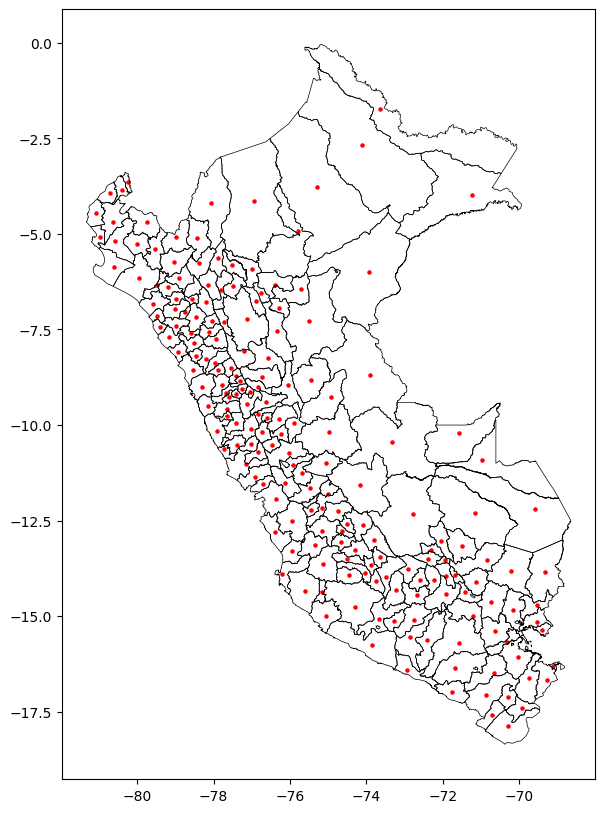

In [21]:
# Asumiento que tu DataFrame se llama 'merged' y tiene:
# - Columna 'geometry' con los polígonos
# - Columna 'centroide' con los puntos (ya en formato Point)

# Convertir a GeoDataFrame (si no lo es ya)
merged_1 = gpd.GeoDataFrame(merged, geometry='geometry')

# Crear figura
fig, ax = plt.subplots(figsize=(10, 10))

# 1. Plotear los polígonos (solo contornos)
merged_1.boundary.plot(ax=ax, color='black', linewidth=0.5)

# 2. Plotear los centroides (asumiendo que la columna se llama 'centroide')
# Si la columna tiene otro nombre, cámbialo en el siguiente línea
merged_1['centroide'].plot(ax=ax, color='red', markersize=5)

# Opcional: Ajustar el aspecto del plot para que no se vea distorsionado
ax.set_aspect('equal')

# Mostrar el plot
plt.show()